**This script will:**

1. Load the dataset into a Pandas DataFrame.
2. Display the first few rows of the dataset.
3. Show the shape (number of rows and columns).
4. Identify missing values.
5. Display the data types of each column.
6. Provide basic statistics (mean, min, max, etc.) for numerical columns.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'sales_data.csv' with the path to your dataset
dataset_path = 'sales_data.xls'
data = pd.read_excel(dataset_path)

# Explore the dataset
# 1. View the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# 2. Get the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(data.shape)

# 3. Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# 4. Check data types of each column
print("\nData types of each column:")
print(data.dtypes)

# 5. Basic statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

First 5 rows of the dataset:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0  

**Key Points:**

**Remove Duplicates:**

The drop_duplicates() method removes duplicate rows.

**Fill Missing Values:**

**Numeric columns:**  
Missing values are filled with the column mean.

**Categorical columns:** Missing values are filled with the column mode (most frequent value).

**Date Conversion:**

The Date column is converted to a datetime object using pd.to_datetime.
Invalid dates (if any) are handled by dropping rows where the conversion failed.

**Output:**
The script will print the number of duplicates removed.
It will show how missing values are handled for each column.
The final dataset structure (info()) will confirm the cleaning steps.

In [ ]:
# Data Cleaning

# 1. Remove duplicates
print("\nNumber of duplicate rows before removal:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removal:", data.duplicated().sum())

# 2. Handle missing values
# Fill missing numeric values with the column mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)
        print(f"Missing values in '{col}' filled with column mean.")

# Fill missing categorical values with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)
        print(f"Missing values in '{col}' filled with mode.")

# 3. Convert the 'Order_date' column to a datetime object
if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
    print("\nConverted 'Order Date' column to datetime object.")
    # Handle rows with invalid dates
    invalid_dates = data['Order Date'].isnull().sum()
    if invalid_dates > 0:
        print(f"Removed {invalid_dates} rows with invalid dates.")
        data = data.dropna(subset=['Order Date'])

# Verify the cleaned dataset
print("\nDataset after cleaning:")
print(data.info())


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

Converted 'Order Date' column to datetime object.

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region      

**Time Series Graph:**

Groups data by Order_date and sums up Sales to plot a trend over time.
The plot() method from Matplotlib is used.

**Scatter Plot (Profit vs. Discount):**

The sns.scatterplot() from Seaborn visualizes the relationship between Profit and Discount, with categories as hues.

**Bar Plots:**

Bar plots visualize the total Sales by Region and Category.
The sns.barplot() function uses estimator=sum to aggregate sales.

**Pie Chart:**

A pie chart shows the percentage distribution of Sales by Region.
Output:

**These visualizations will help identify:**

1. Sales trends over time.
2. Impact of discounts on profit margins.
3. Regional and categorical sales performance.

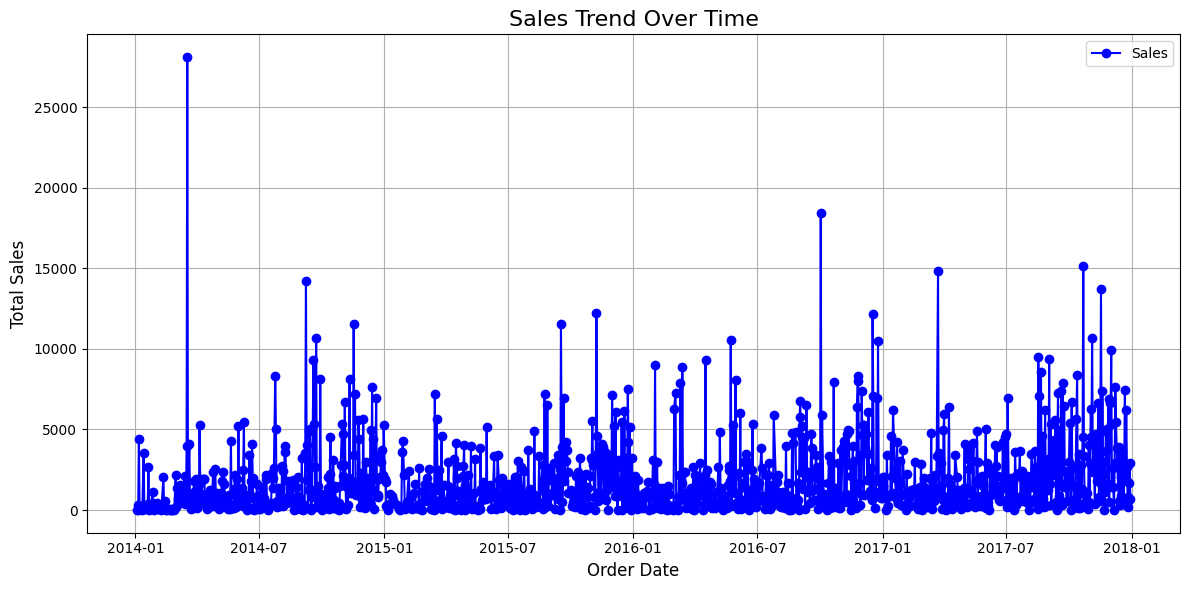

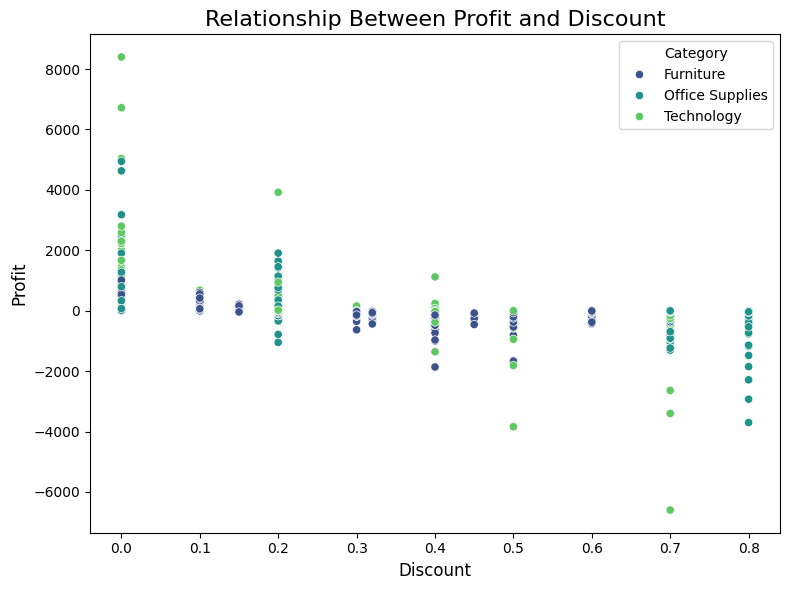

<ipython-input-7-71a742e0e06f>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Region', y='Sales', estimator=sum, ci=None, palette='muted')
<ipython-input-7-71a742e0e06f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Region', y='Sales', estimator=sum, ci=None, palette='muted')


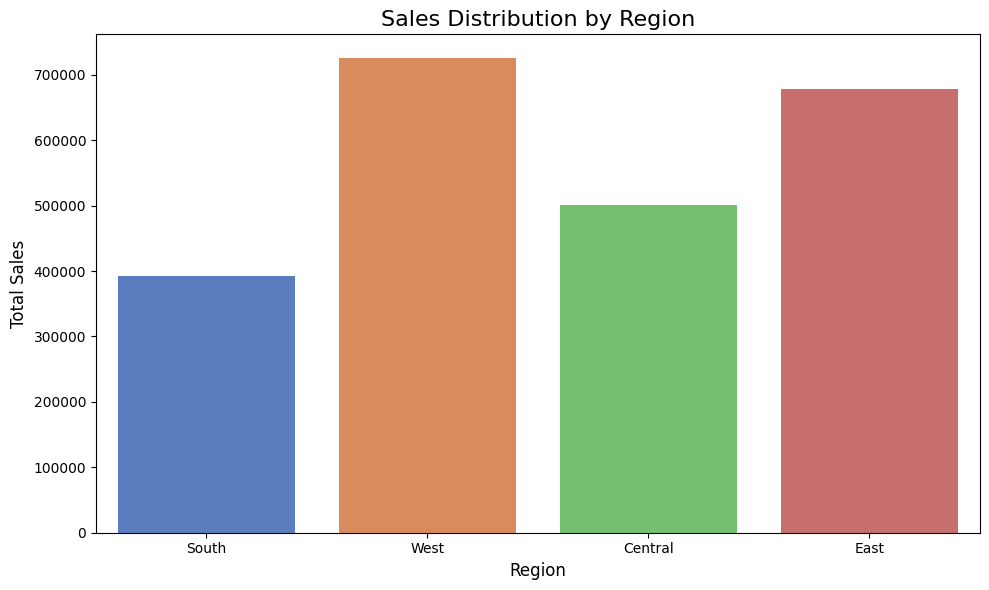

<ipython-input-7-71a742e0e06f>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None, palette='muted')
<ipython-input-7-71a742e0e06f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None, palette='muted')


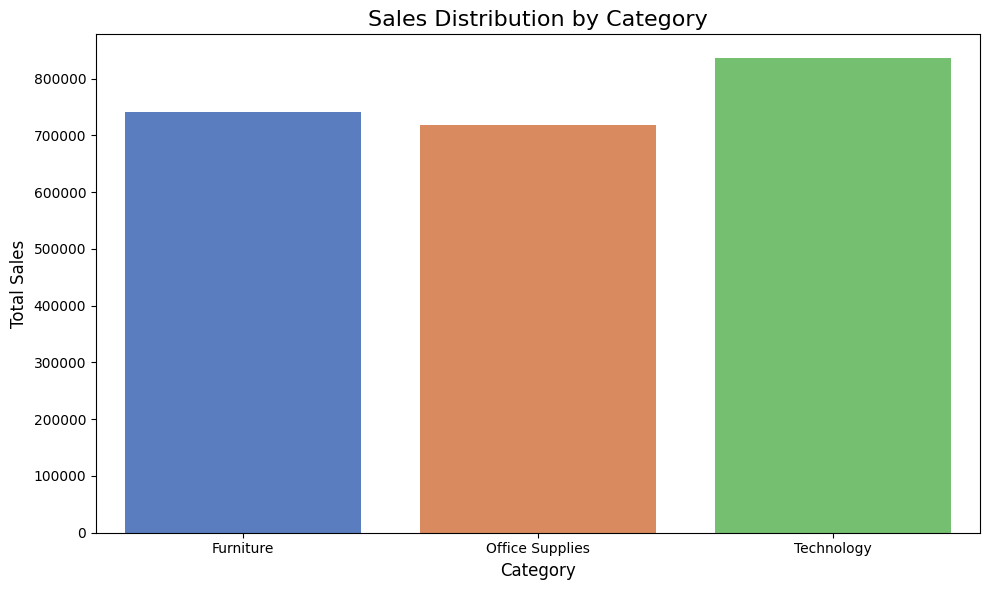

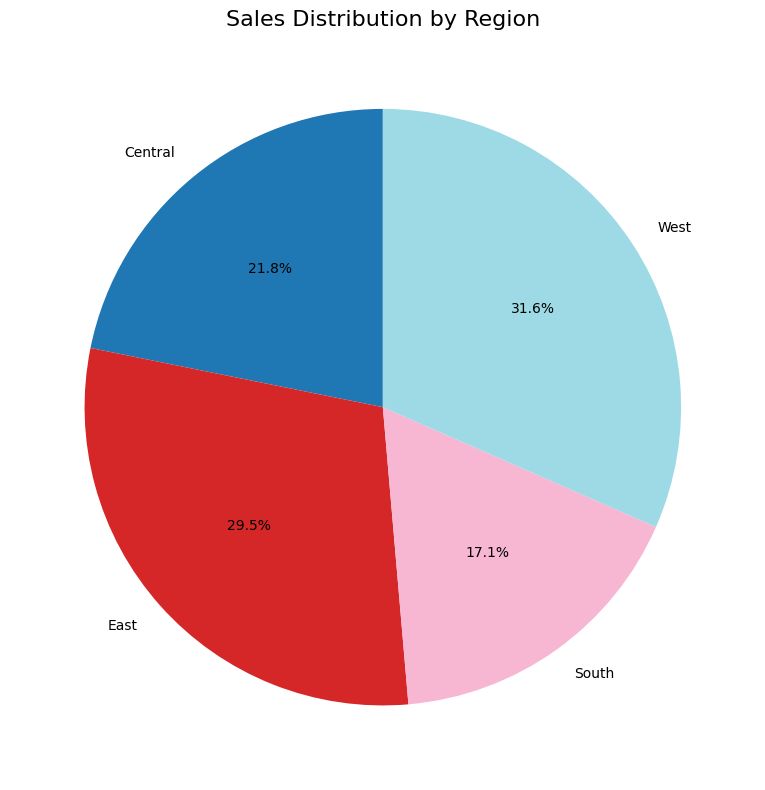

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot time series graphs for trends in Sales over time
if 'Order Date' in data.columns and 'Sales' in data.columns:
    sales_trend = data.groupby('Order Date')['Sales'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(sales_trend['Order Date'], sales_trend['Sales'], marker='o', color='b', label='Sales')
    plt.title('Sales Trend Over Time', fontsize=16)
    plt.xlabel('Order Date', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 2. Scatter plot to study the relationship between Profit and Discount
if 'Profit' in data.columns and 'Discount' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Discount', y='Profit', hue='Category', palette='viridis')
    plt.title('Relationship Between Profit and Discount', fontsize=16)
    plt.xlabel('Discount', fontsize=12)
    plt.ylabel('Profit', fontsize=12)
    plt.legend(title='Category')
    plt.tight_layout()
    plt.show()

# 3. Bar plot for sales distribution by Region and Category
if 'Region' in data.columns and 'Sales' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Region', y='Sales', estimator=sum, ci=None, palette='muted')
    plt.title('Sales Distribution by Region', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

if 'Category' in data.columns and 'Sales' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Category', y='Sales', estimator=sum, ci=None, palette='muted')
    plt.title('Sales Distribution by Category', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

# 4. Optional: Pie chart for sales distribution by Region
if 'Region' in data.columns and 'Sales' in data.columns:
    region_sales = data.groupby('Region')['Sales'].sum()
    plt.figure(figsize=(8, 8))
    region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
    plt.title('Sales Distribution by Region', fontsize=16)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

**Feature Selection:**

Profit and Discount are used as features (X), and Sales is the target variable (y).

**Data Splitting:**
The dataset is split into training (80%) and testing (20%) subsets using train_test_split.

**Model Training:**
A Linear Regression model is trained using the training data.

**Predictions:**
The model predicts Sales on the test data (X_test).

**Evaluation:**

**Mean Squared Error (MSE):** Measures average prediction error.

**R-squared (R2):** Indicates how well the model explains the variance in Sales.

**Model Coefficients:**
Displays the coefficients of Profit and Discount, providing insights into their impact on Sales.

**Output:**
Training and testing data size.

**Model evaluation metrics:** MSE and R-squared.
Coefficients for Profit and Discount to interpret their influence on Sales.

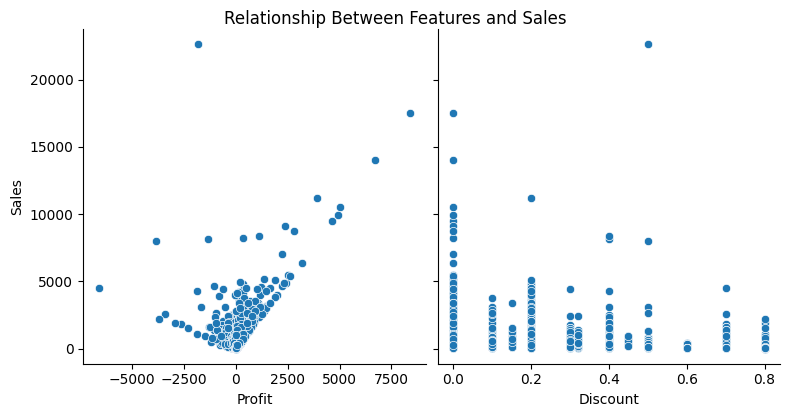


Revised Linear Regression Model Results:
Mean Squared Error (MSE): 700271.89
R-squared (R2 Score): -0.19


In [ ]:
# 1. Visualize the relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Check relationship between features and target
sns.pairplot(data, x_vars=['Profit', 'Discount'], y_vars='Sales', kind='scatter', height=4)
plt.suptitle("Relationship Between Features and Sales", y=1.02)
plt.show()

# 2. Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data[['Profit', 'Discount']]
y = data['Sales']

# Scale features
X_scaled = scaler.fit_transform(X)

# 3. Train a new model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRevised Linear Regression Model Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")